In [17]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

filenames = []

for file in os.listdir('/content/drive/MyDrive/image'):
    filenames.append(os.path.join('/content/drive/MyDrive/image',file))

feature_list = []

for file in tqdm(filenames):
    feature_list.append(extract_features(file,model))

pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(filenames,open('filenames.pkl','wb'))

FileNotFoundError: ignored

In [ ]:
import pickle
# import tensorflow
# import numpy as np
# from numpy.linalg import norm
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.layers import GlobalMaxPooling2D
# from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.neighbors import NearestNeighbors
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
feature_list = np.array(pickle.load(open('/content/embeddings (1).pkl','rb')))
filenames = pickle.load(open('/content/filenames.pkl','rb'))

FileNotFoundError: ignored

In [ ]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])


1/1 [==============================] - 2s 2s/step
[[2002 2052 2288 2297 2078 2011]]


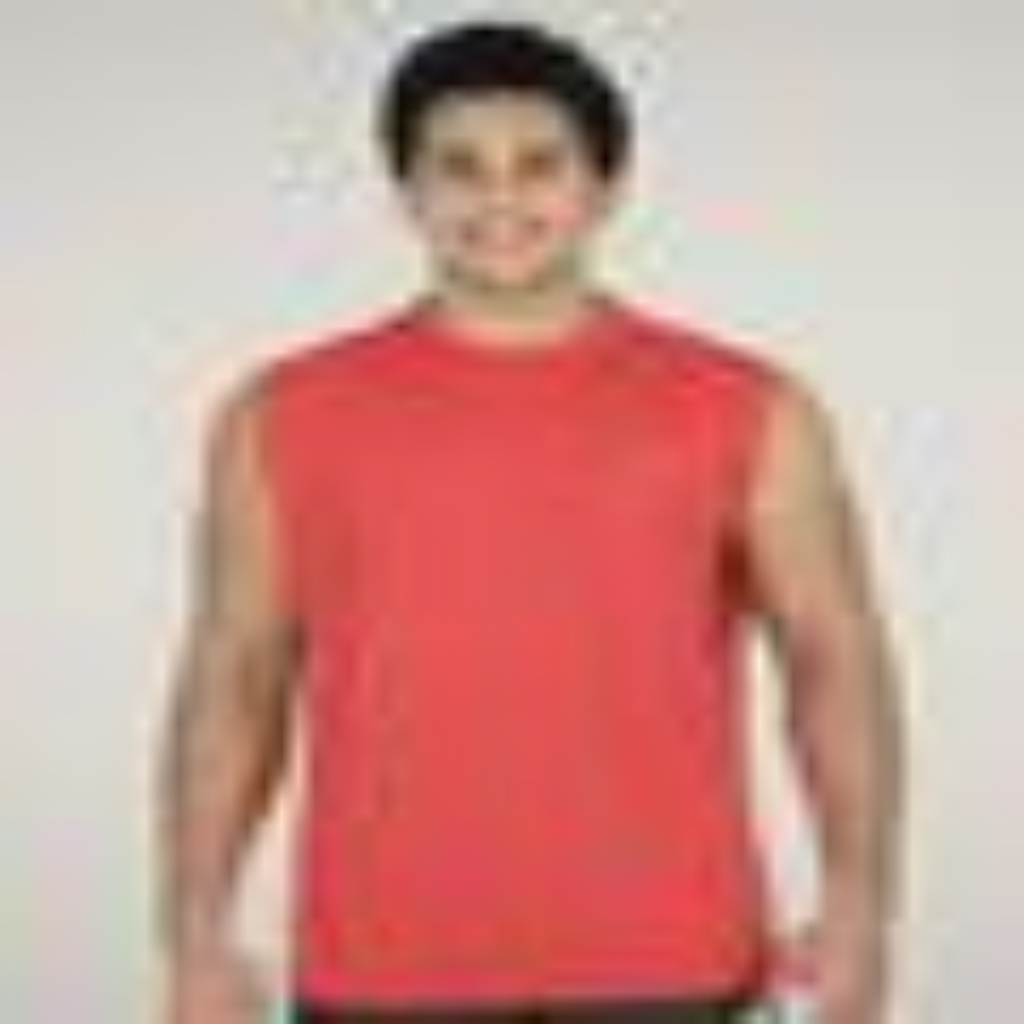

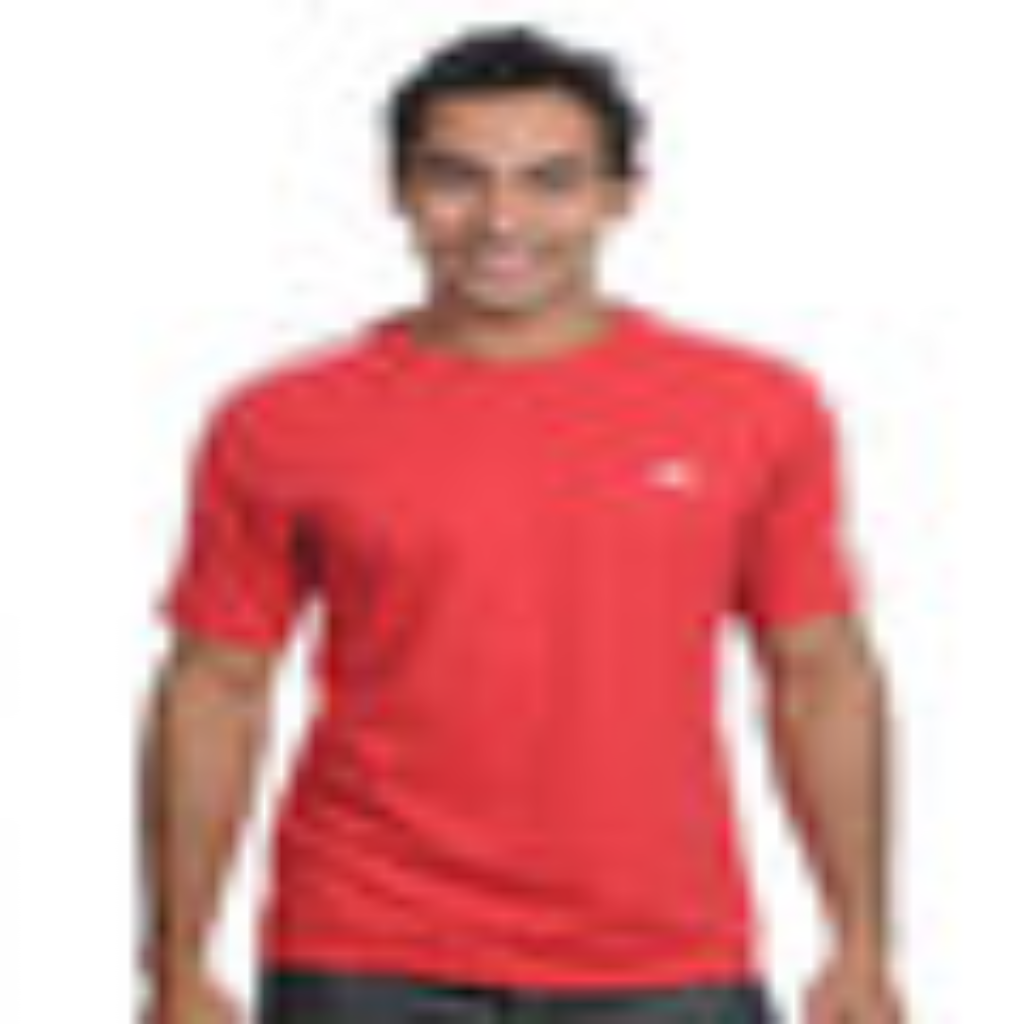

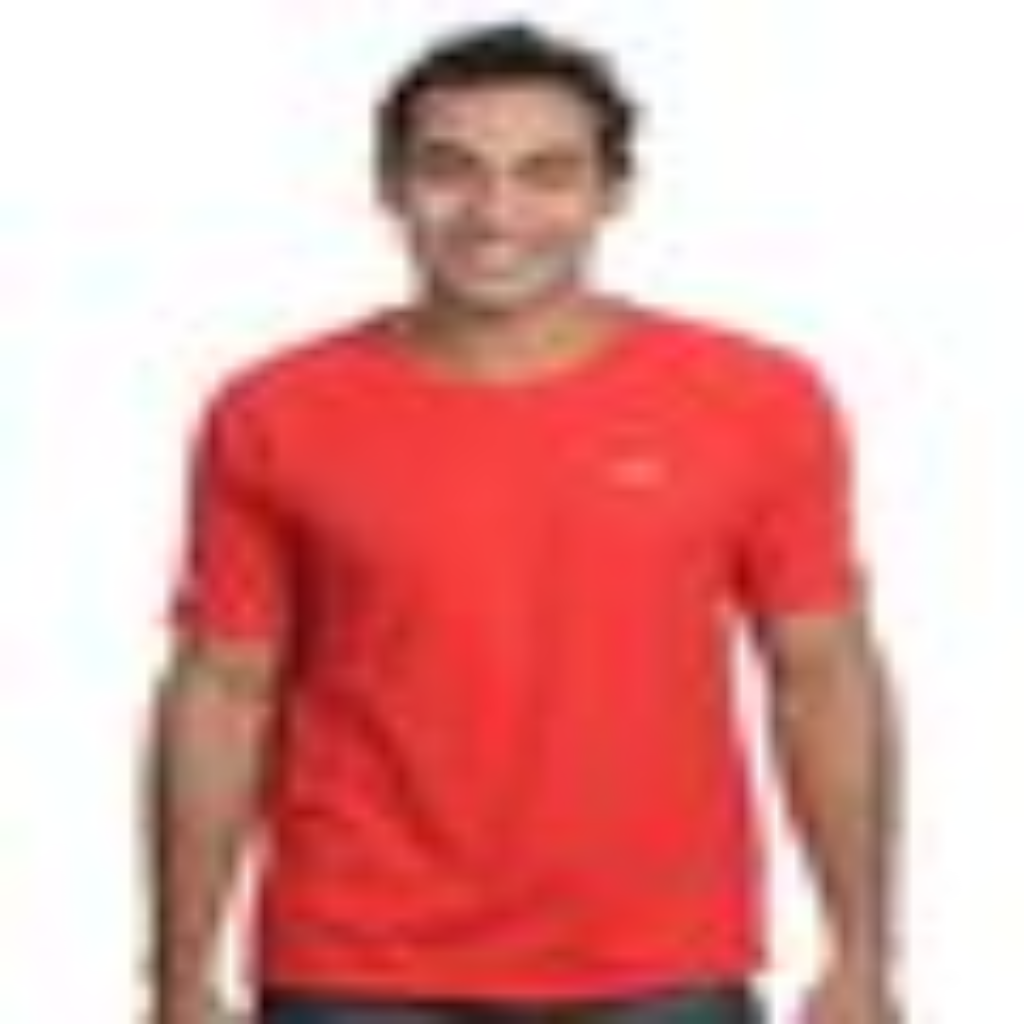

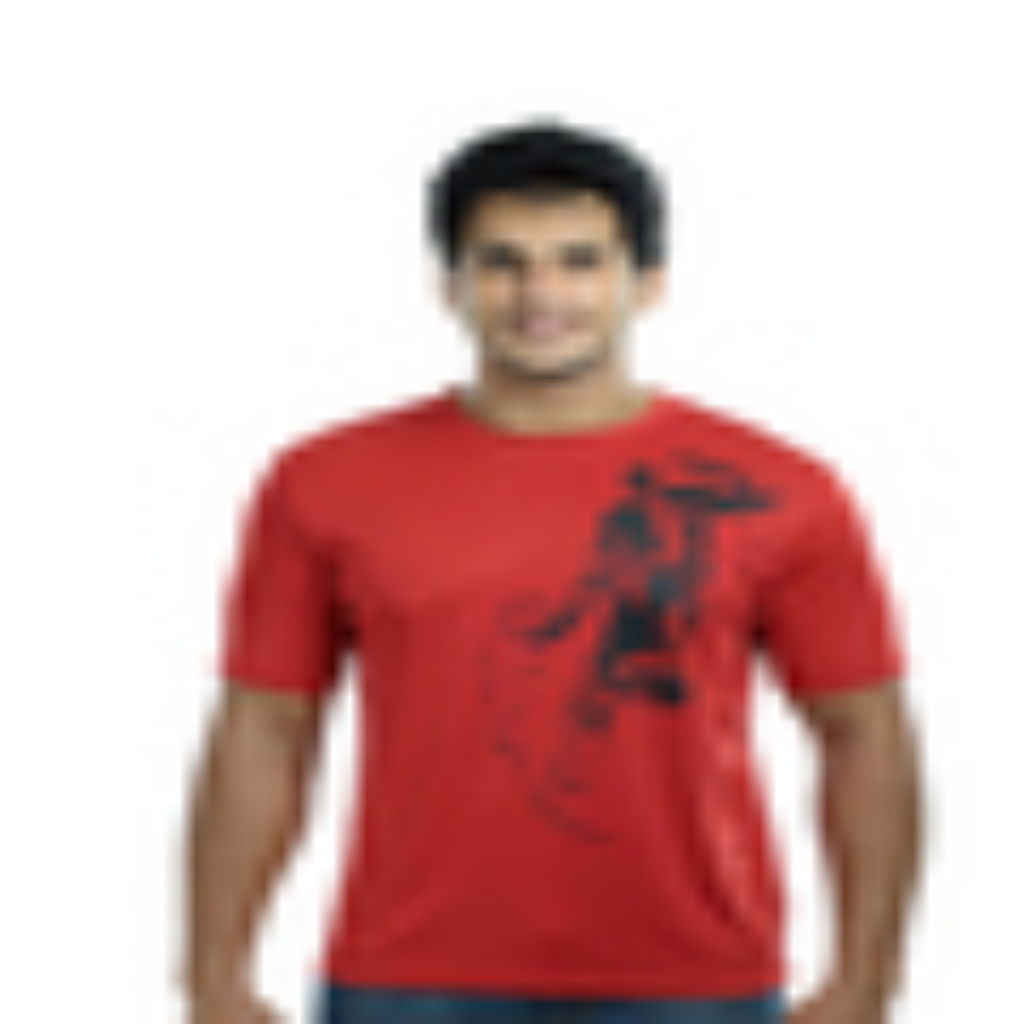

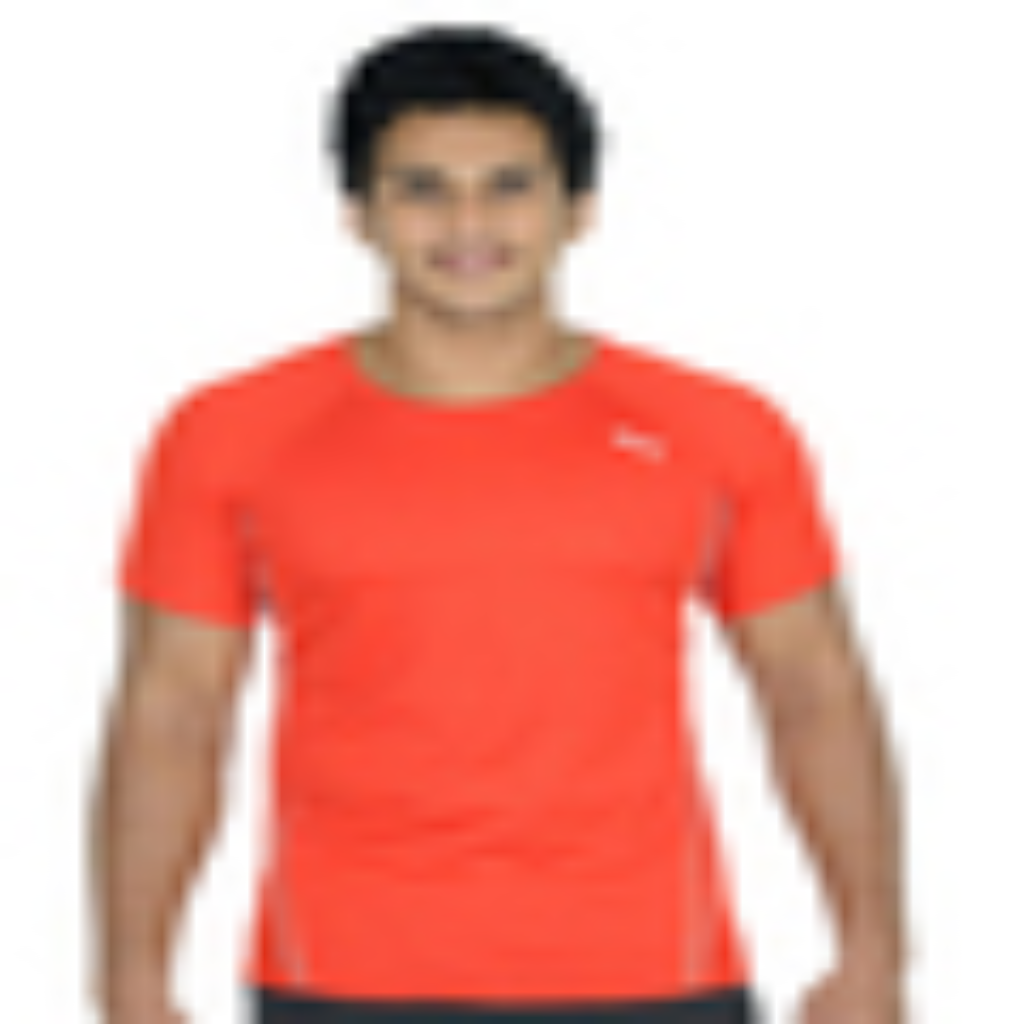

In [ ]:
img = image.load_img('/content/1529.jpg',target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

distances,indices = neighbors.kneighbors([normalized_result])

print(indices)

for file in indices[0][1:6]:
    temp_img = cv2.imread(filenames[file])
    cv2_imshow(cv2.resize(temp_img,(1024,1024)))
    cv2.waitKey(0)


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [ ]:
pip install TensorRT

  Preparing metadata (setup.py) ... done
  Created wheel for TensorRT: filename=tensorrt-8.6.1.post1-py2.py3-none-any.whl size=17283 sha256=b18be025244c3458e469fef81c2016c1e115ca30e39cdc0b65af4c85ffcd2770
  Stored in directory: /root/.cache/pip/wheels/f4/c8/0e/b79b08e45752491b9acfdbd69e8a609e8b2ed7640dda5a3e59
Successfully built TensorRT


In [19]:
%%writefile app.py
import streamlit as st
import os

from PIL import Image
import numpy as np
import pickle
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm

feature_list = np.array(pickle.load(open('embeddings.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

st.title('Recommendation System')

def save_uploaded_file(uploaded_file):
    try:
        with open(os.path.join('/content/drive/MyDrive/upload1',uploaded_file.name),'wb') as f:
            f.write(uploaded_file.getbuffer())
        return 1
    except Exception as e:
        print(e)
        return 0

def feature_extraction(img_path,model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

def recommend(features,feature_list):
    neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
    neighbors.fit(feature_list)

    distances, indices = neighbors.kneighbors([features])

    return indices

# steps
# file upload -> save
uploaded_file = st.file_uploader("Choose an image")
if uploaded_file is not None:
    if save_uploaded_file(uploaded_file):
        # display the file
        display_image = Image.open(uploaded_file)
        st.image(display_image)
        # feature extract
        features = feature_extraction(os.path.join("/content/drive/MyDrive/upload1",uploaded_file.name),model)
        #st.text(features)
        # recommendention
        indices = recommend(features,feature_list)
        # show
        col1,col2,col3,col4,col5 = st.columns(5)

        with col1:
            st.image(filenames[indices[0][0]])
        with col2:
            st.image(filenames[indices[0][1]])
        with col3:
            st.image(filenames[indices[0][2]])
        with col4:
            st.image(filenames[indices[0][3]])
        with col5:
            st.image(filenames[indices[0][4]])
    else:
        st.header("Some error occured in file upload")


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.245.98.12
[##................] / fetchMetadata: sill resolveWithNewModule ms@2.1.2 checki


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.98.12:8501

npx: installed 22 in 3.899s
your url is: https://four-cars-film.loca.lt
2023-12-17 18:36:32.068647: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 18:36:32.068734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 18:36:32.071362: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-17 18:36:33.678101: W tensorflow/compiler/tf2tensorrt